In [1]:
from math import sqrt
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()


In [2]:
from sklearn import metrics
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error 

#Import K-Nearest Neighbour libraries

--- 
 
 
# K Nearest Neighbour, briefly Check Gorrelation of General Data

  
> #### We want to see if there is a correlation between our factors and `normalized_ranking`
>We can use K Nearst Neighbour to determine classification score
> 
>> We use the data visualized in `cleaned_gen_match_stats.csv` from [2a_comprehensive_data_cleaning_erangel_gen](https://github.com/Gyanroh/SC1015_PUBG_Project/blob/main/2_Cleaning_Data/2a_comprehensive_data_cleaning_erangel_gen.ipynb)
>><br>First, we take a sample of 1000000 to speed up processing time

In [3]:
erangel_gen = pd.read_csv('cleaned_gen_match_stats.csv')

In [4]:
erangel_gen['normalized_ranking'] = (erangel_gen['normalized_ranking'] * 100).round(3)
erangel_gen.describe().applymap(lambda x: f"{x:0.3f}")

,game_size,party_size,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_survive_time,normalized_ranking
count,11821822.000,11821822.000,11821822.000,11821822.000,11821822.000,11821822.000,11821822.000,11821822.000,11821822.000
mean,45.773,2.756,0.410,1132.549,1227.639,102.196,0.683,764.021,49.755
std,23.231,1.216,0.647,1869.061,1198.361,121.626,1.120,563.318,28.682
min,24.000,1.000,0.000,0.000,1.000,0.000,0.000,50.405,0.000
25%,27.000,2.000,0.000,0.000,219.673,0.000,0.000,244.813,25.000
50%,43.000,2.000,0.000,0.000,821.483,72.000,0.000,615.374,51.000
75%,50.000,4.000,1.000,1838.660,1986.821,152.000,1.000,1251.628,75.000
max,96.000,4.000,2.000,14974.475,36748.125,3646.000,35.000,2373.716,98.900


In [20]:
erangel_sample = erangel_gen.sample(n = 1000000) 


---


# Train & Test 

>  We use target varible `normalized_ranking`
> <br>We correlate it with `"game_size", "player_kills", "player_survive_time", "player_dmg", "player_dbno", "player_dist_walk", "player_dist_ride"`

In [21]:
#Extract Response and Predictors
y = pd.DataFrame(erangel_sample['normalized_ranking'])
X = pd.DataFrame(erangel_sample[["game_size", "player_kills", "player_survive_time", "player_dmg", "player_dbno", "player_dist_walk", "player_dist_ride"]])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

MinMax = MinMaxScaler(feature_range=(0, 1))
x_train_MinMax = MinMax.fit_transform(X_train)
x_train = pd.DataFrame(x_train_MinMax)
x_test_MinMax = MinMax.fit_transform(X_test)
x_test = pd.DataFrame(x_test_MinMax)

In [22]:
rmse_val = [] #Engage to store different Kvalue
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 19.17290483990363
RMSE value for k=  2 is: 16.351705893422864
RMSE value for k=  3 is: 15.604350310445836
RMSE value for k=  4 is: 15.07126641680287
RMSE value for k=  5 is: 14.822267056695477
RMSE value for k=  6 is: 14.672154884621868
RMSE value for k=  7 is: 14.503873687355924
RMSE value for k=  8 is: 14.433879253773048
RMSE value for k=  9 is: 14.337894566023971
RMSE value for k=  10 is: 14.250694522548716
RMSE value for k=  11 is: 14.25419002194857
RMSE value for k=  12 is: 14.180397696095989
RMSE value for k=  13 is: 14.139883757567274
RMSE value for k=  14 is: 14.089617750478252
RMSE value for k=  15 is: 14.035576607717656
RMSE value for k=  16 is: 14.004263111038835
RMSE value for k=  17 is: 14.013101933708263
RMSE value for k=  18 is: 14.017115385097455
RMSE value for k=  19 is: 13.992776827523382
RMSE value for k=  20 is: 14.01137269328027


<AxesSubplot:>

<Figure size 1728x864 with 0 Axes>

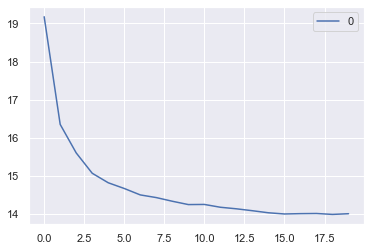

In [23]:
curve = pd.DataFrame(rmse_val) #elbow curve 
f = plt.figure(figsize=(24,12))
curve.plot()

In [24]:
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 15}

In [25]:
RegModel = KNeighborsRegressor(n_neighbors=3)
model_result_KNN=RegModel.fit(X_train,y_train)
y_pred = model_result_KNN.predict(X_test)

In [26]:
print('R2 Value:',metrics.r2_score(y_test, y_pred))

R2 Value: 0.6835246531043887


---


# Conclusion

>  A R2 value of `0.8835246531043887` is pretty decent. We can continue with other machine learning techniques like linear regression for other information